# Packages

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures

# Load training.csv and validation.csv files

In [208]:
validation = pd.read_csv("../Data/validation.csv", sep="\t")
training = pd.read_csv("../Data/training.csv", sep="\t")
training = training.apply(pd.to_numeric, errors='coerce')
validation = validation.apply(pd.to_numeric, errors='coerce')

# Training info

In [209]:
print(training.columns.tolist())
print("Shape:", training.shape)
print(training.info())
training.describe(include='all')

['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay', 'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route', 'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (29731, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DepartureDate     0 non-null      float64
 1   DepartureYear     29731 non-null  int64  
 2   DepartureMonth    29731 non-null  int64  
 3   DepartureDay      29731 non-null  int64  
 4   FlightNumber      29731 non-null  int64  
 5   DepartureAirport  0 non-null      float64
 6   ArrivalAirport    0 non-null      float64
 7   Route             0 non-null      float64
 8   ActualFlightTime  29731 non-null  int64  
 9   ActualTotalFuel   29731 non-null  int64  
 10  ActualTOW         29298 non-null  float64
 11  FlownPassengers   29

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,0.0,29731.0,29731.0,29731.000000,29731.000000,0.0,0.0,0.0,29731.000000,29731.000000,29298.000000,29636.000000,27447.000000,27253.000000
mean,NaN,2016.0,10.0,7.987723,4814.133934,NaN,NaN,NaN,110.069221,4782.483536,65031.246638,167.268626,45.417022,573.618464
std,NaN,0.0,0.0,4.313351,3062.612334,NaN,NaN,NaN,52.457470,2069.865460,3339.385728,20.177527,32.797217,376.524581
min,NaN,2016.0,10.0,1.000000,1.000000,NaN,NaN,NaN,2.000000,600.000000,42991.000000,4.000000,1.000000,3.000000
25%,NaN,2016.0,10.0,4.000000,2087.000000,NaN,NaN,NaN,73.000000,3210.000000,63127.000000,163.000000,23.000000,300.000000
50%,NaN,2016.0,10.0,8.000000,4765.000000,NaN,NaN,NaN,105.000000,4530.000000,65122.000000,173.000000,39.000000,490.000000
75%,NaN,2016.0,10.0,12.000000,7496.000000,NaN,NaN,NaN,140.000000,6010.000000,67154.000000,179.000000,62.000000,780.000000
max,NaN,2016.0,10.0,15.000000,9998.000000,NaN,NaN,NaN,1504.000000,17890.000000,74283.000000,189.000000,1180.000000,10530.000000


# Validation info

In [210]:
print(validation.columns.tolist())
print("Shape:", validation.shape)
print(validation.info())
validation.describe(include='all')

['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay', 'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route', 'ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (1878, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DepartureDate     0 non-null      float64
 1   DepartureYear     1878 non-null   int64  
 2   DepartureMonth    1878 non-null   int64  
 3   DepartureDay      1878 non-null   int64  
 4   FlightNumber      1878 non-null   int64  
 5   DepartureAirport  0 non-null      float64
 6   ArrivalAirport    0 non-null      float64
 7   Route             0 non-null      float64
 8   ActualFlightTime  1878 non-null   int64  
 9   ActualTotalFuel   1878 non-null   int64  
 10  FlownPassengers   1869 non-null   float64
 11  BagsCount         1710 non-null   fl

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight
count,0.0,1878.0,1878.0,1878.0,1878.000000,0.0,0.0,0.0,1878.000000,1878.000000,1869.000000,1710.000000,1697.000000
mean,NaN,2016.0,11.0,1.0,4673.227370,NaN,NaN,NaN,110.446219,4709.011715,166.103264,36.250292,446.149087
std,NaN,0.0,0.0,0.0,3069.845977,NaN,NaN,NaN,51.150847,2071.596772,26.391906,23.799249,275.057285
min,NaN,2016.0,11.0,1.0,11.000000,NaN,NaN,NaN,7.000000,1100.000000,6.000000,2.000000,20.000000
25%,NaN,2016.0,11.0,1.0,1995.250000,NaN,NaN,NaN,72.000000,3200.000000,163.000000,19.000000,250.000000
50%,NaN,2016.0,11.0,1.0,4566.500000,NaN,NaN,NaN,104.000000,4420.500000,174.000000,31.000000,390.000000
75%,NaN,2016.0,11.0,1.0,7452.750000,NaN,NaN,NaN,140.000000,5895.500000,180.000000,47.000000,590.000000
max,NaN,2016.0,11.0,1.0,9995.000000,NaN,NaN,NaN,318.000000,13040.000000,189.000000,260.000000,1700.000000


# Claning files from unnecessary columns and change dtype to numeric

In [211]:
training = training.drop(columns=[ "DepartureDate","DepartureYear","DepartureMonth","DepartureDay","ArrivalAirport","DepartureAirport","FlightNumber","Route"])
validation = validation.drop(columns=[ "DepartureDate","DepartureYear","DepartureMonth","DepartureDay","ArrivalAirport","DepartureAirport","FlightNumber","Route"])


# Trainig info

In [212]:
print(training.columns.tolist())
print("Shape:", training.shape)
print(training.info())
training.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (29731, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  29731 non-null  int64  
 1   ActualTotalFuel   29731 non-null  int64  
 2   ActualTOW         29298 non-null  float64
 3   FlownPassengers   29636 non-null  float64
 4   BagsCount         27447 non-null  float64
 5   FlightBagsWeight  27253 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB
None


,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,29731.000000,29731.000000,29298.000000,29636.000000,27447.000000,27253.000000
mean,110.069221,4782.483536,65031.246638,167.268626,45.417022,573.618464
std,52.457470,2069.865460,3339.385728,20.177527,32.797217,376.524581
min,2.000000,600.000000,42991.000000,4.000000,1.000000,3.000000
25%,73.000000,3210.000000,63127.000000,163.000000,23.000000,300.000000
50%,105.000000,4530.000000,65122.000000,173.000000,39.000000,490.000000
75%,140.000000,6010.000000,67154.000000,179.000000,62.000000,780.000000
max,1504.000000,17890.000000,74283.000000,189.000000,1180.000000,10530.000000


# Validation Info

In [213]:
print(validation.columns.tolist())
print("Shape:", validation.shape)
print(validation.info())
validation.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (1878, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  1878 non-null   int64  
 1   ActualTotalFuel   1878 non-null   int64  
 2   FlownPassengers   1869 non-null   float64
 3   BagsCount         1710 non-null   float64
 4   FlightBagsWeight  1697 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 73.5 KB
None


,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight
count,1878.000000,1878.000000,1869.000000,1710.000000,1697.000000
mean,110.446219,4709.011715,166.103264,36.250292,446.149087
std,51.150847,2071.596772,26.391906,23.799249,275.057285
min,7.000000,1100.000000,6.000000,2.000000,20.000000
25%,72.000000,3200.000000,163.000000,19.000000,250.000000
50%,104.000000,4420.500000,174.000000,31.000000,390.000000
75%,140.000000,5895.500000,180.000000,47.000000,590.000000
max,318.000000,13040.000000,189.000000,260.000000,1700.000000


# Delete Misiing data

In [214]:
training.replace("(null)", np.nan, inplace=True)
validation.replace("(null)", np.nan, inplace=True)

# Info about amount of missing data

In [215]:
missing_data_trainig_count = training.isnull().sum()
print("Missing values in trainig data  columns:\n", missing_data_trainig_count)

missing_data_validation_count = validation.isnull().sum()
print("Missing values in validation data columns:\n", missing_data_validation_count)

Missing values in trainig data  columns:
 ActualFlightTime       0
ActualTotalFuel        0
ActualTOW            433
FlownPassengers       95
BagsCount           2284
FlightBagsWeight    2478
dtype: int64
Missing values in validation data columns:
 ActualFlightTime      0
ActualTotalFuel       0
FlownPassengers       9
BagsCount           168
FlightBagsWeight    181
dtype: int64


# Save missing records from training and validadation data

In [216]:

trainig_missing_rows = training[training.isnull().any(axis=1)]
validate_missing_rows = validation[validation.isnull().any(axis=1)]

trainig_missing_rows.to_csv("../Data/missing_data/trainng.csv", sep="\t", index=False)
validate_missing_rows.to_csv("../Data/missing_data/validation.csv", sep="\t", index=False)

# Cleaning from missing data

In [217]:
training_cleaned = training.dropna()
validation_cleaned = validation.dropna()

In [218]:

print("Missing values in trainig data columns after cleaning:\n", training_cleaned.isnull().sum())
print("Missing values in validate data columns:after cleaning \n", validation_cleaned.isnull().sum())

Missing values in trainig data columns after cleaning:
 ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FlownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64
Missing values in validate data columns:after cleaning 
 ActualFlightTime    0
ActualTotalFuel     0
FlownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64


# Trainig data info

In [219]:
training_cleaned = training_cleaned.apply(pd.to_numeric, errors='coerce')
print(training_cleaned.columns.tolist())
print("Shape:", training_cleaned.shape)
print(training_cleaned.info())
training_cleaned.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (26800, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 26800 entries, 0 to 29730
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  26800 non-null  int64  
 1   ActualTotalFuel   26800 non-null  int64  
 2   ActualTOW         26800 non-null  float64
 3   FlownPassengers   26800 non-null  float64
 4   BagsCount         26800 non-null  float64
 5   FlightBagsWeight  26800 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB
None


,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,26800.000000,26800.000000,26800.000000,26800.000000,26800.000000,26800.000000
mean,109.947313,4785.035149,65084.024440,167.371866,45.184701,574.733881
std,51.062325,2054.238577,3235.481903,19.884646,32.548338,375.870211
min,2.000000,720.000000,49322.000000,13.000000,1.000000,6.000000
25%,73.000000,3230.000000,63163.000000,163.000000,23.000000,300.000000
50%,105.000000,4533.000000,65158.000000,173.000000,38.000000,490.000000
75%,139.000000,6000.000000,67172.000000,179.000000,61.000000,787.250000
max,1440.000000,14090.000000,74283.000000,189.000000,1180.000000,10530.000000


# Validation data info

In [220]:
print(validation_cleaned.columns.tolist())
print("Shape:", validation_cleaned.shape)
print(validation_cleaned.info())
validation_cleaned.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (1689, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 0 to 1877
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  1689 non-null   int64  
 1   ActualTotalFuel   1689 non-null   int64  
 2   FlownPassengers   1689 non-null   float64
 3   BagsCount         1689 non-null   float64
 4   FlightBagsWeight  1689 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 79.2 KB
None


,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,110.137951,4699.534636,166.563055,35.960332,447.946122
std,50.514585,2038.720623,26.085481,23.571590,274.416717
min,7.000000,1100.000000,6.000000,2.000000,20.000000
25%,73.000000,3215.000000,164.000000,19.000000,250.000000
50%,104.000000,4430.000000,175.000000,31.000000,390.000000
75%,140.000000,5870.000000,180.000000,47.000000,590.000000
max,313.000000,12980.000000,189.000000,260.000000,1700.000000


# Histograms

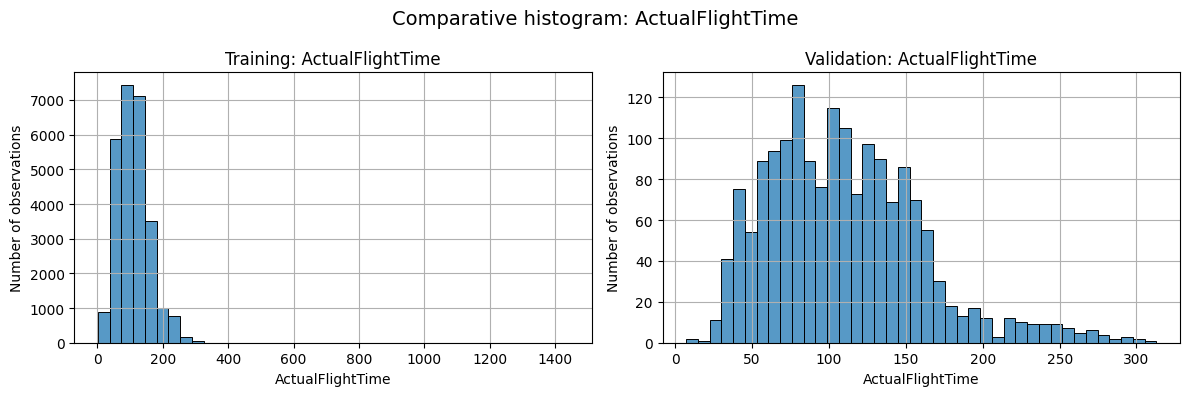

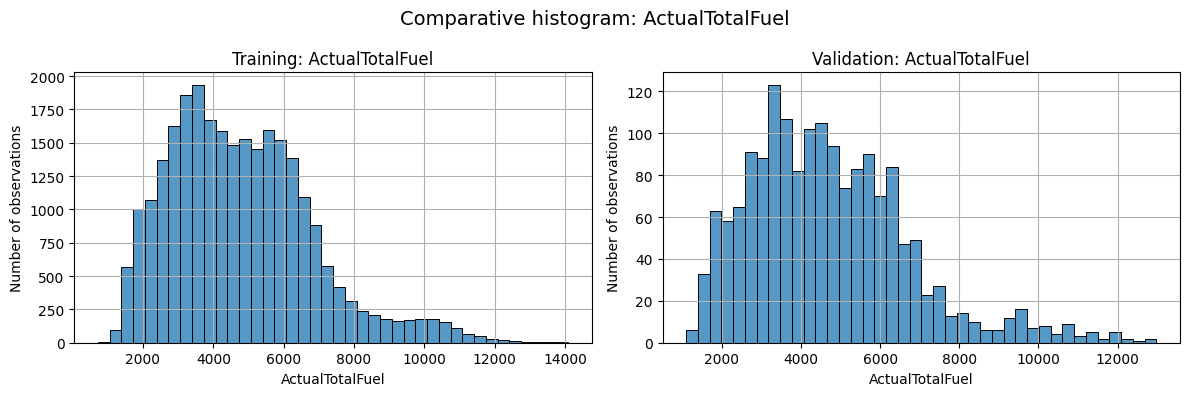

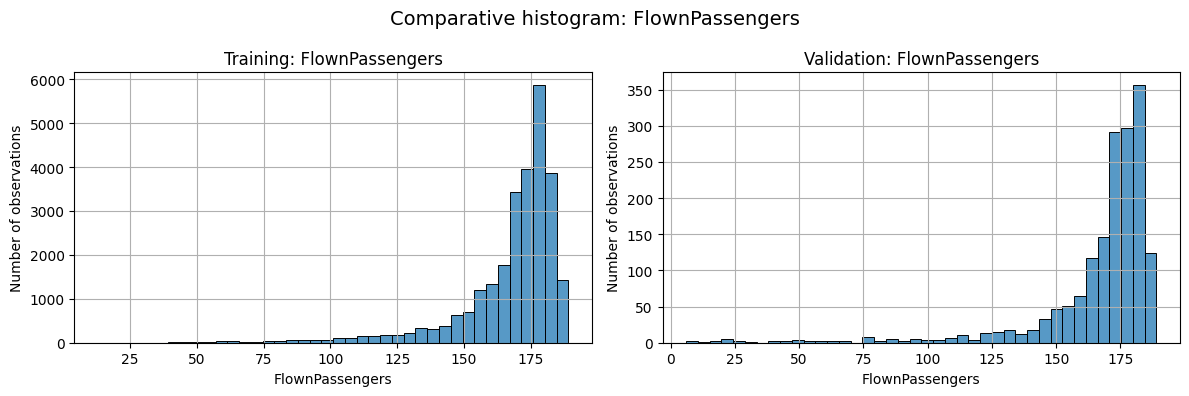

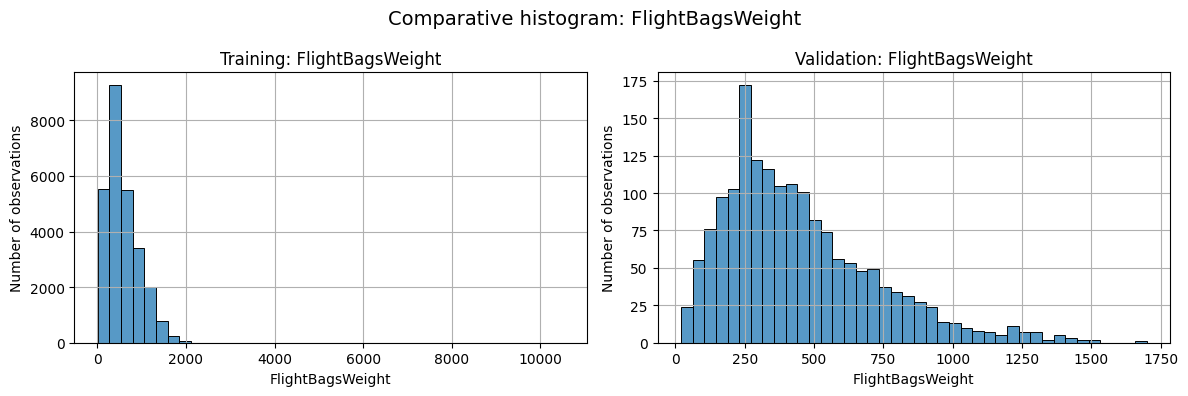

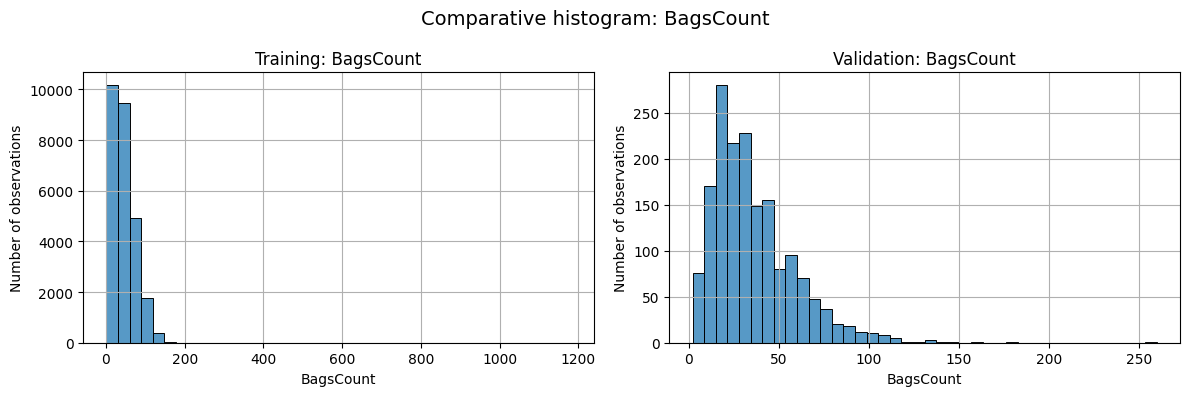

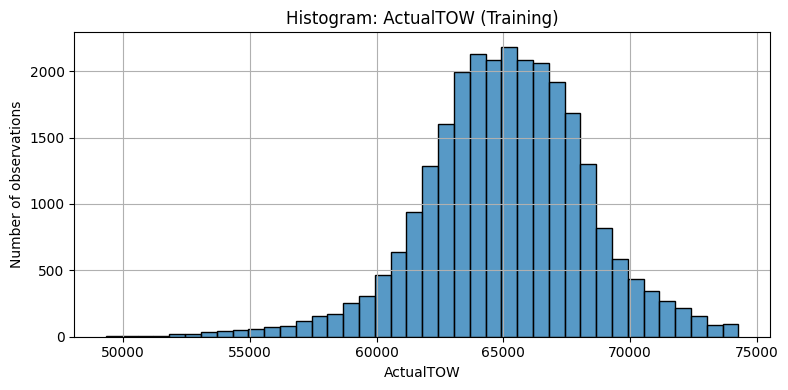

In [221]:

def plot_comparative_histograms(train_df, val_df, columns, bins=40):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(train_df[col], bins=bins, ax=axes[0], kde=False)
        axes[0].set_title(f"Training: {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Number of observations")
        axes[0].grid(True)

        sns.histplot(val_df[col], bins=bins, ax=axes[1], kde=False)
        axes[1].set_title(f"Validation: {col}")
        axes[1].set_xlabel(col)
        axes[1].set_ylabel("Number of observations")
        axes[1].grid(True)

        fig.suptitle(f"Comparative histogram: {col}", fontsize=14)
        plt.tight_layout()
        plt.show()

columns_to_plot = [
    'ActualFlightTime',
    'ActualTotalFuel',
    'FlownPassengers',
    'FlightBagsWeight',
    'BagsCount'
]

plot_comparative_histograms(training_cleaned, validation_cleaned, columns_to_plot)


plt.figure(figsize=(8, 4))
sns.histplot(training_cleaned['ActualTOW'], bins=40, kde=False)
plt.title("Histogram: ActualTOW (Training)")
plt.xlabel("ActualTOW")
plt.ylabel("Number of observations")
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter Plots

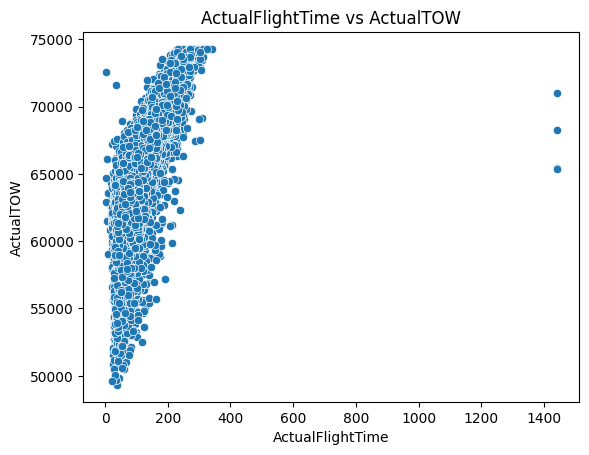

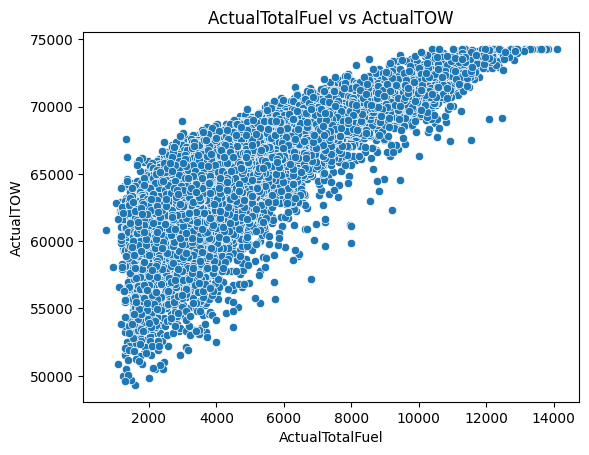

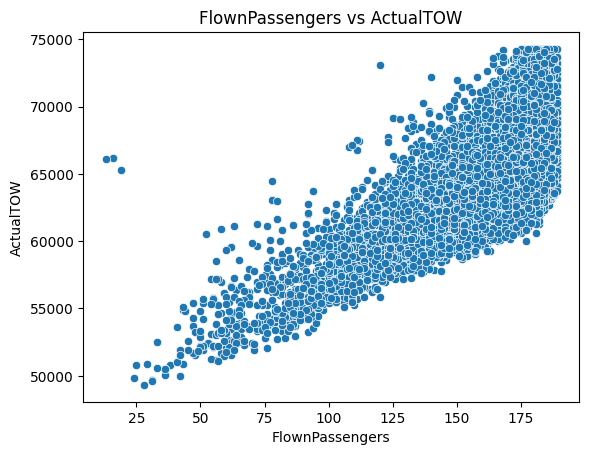

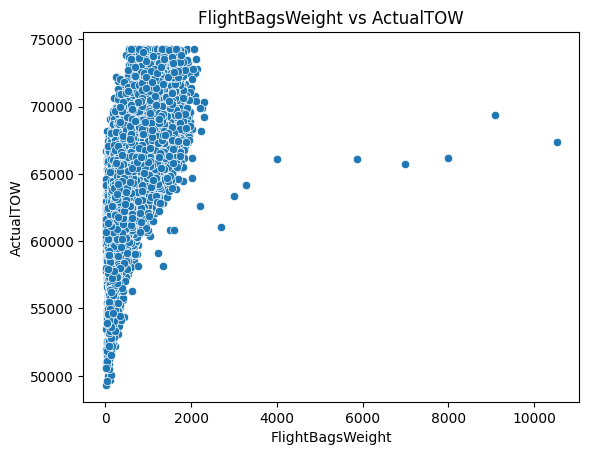

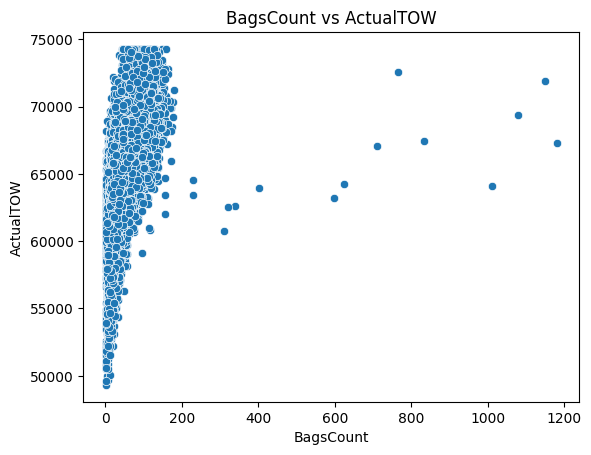

In [222]:
for col in columns_to_plot:
    sns.scatterplot(x=col, y='ActualTOW', data=training_cleaned)
    plt.title(f"{col} vs ActualTOW")
    plt.show()


# Trainig data heatmap

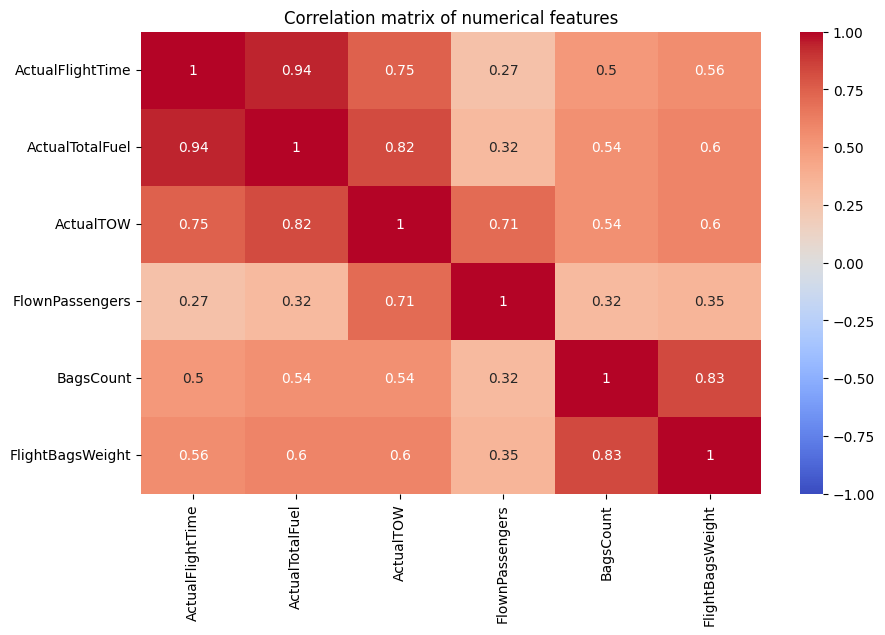

In [223]:
corr = training_cleaned.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Correlation matrix of numerical features")
plt.show()

# Filter Trainig data from outlier_values

In [224]:
training_cleaned['ActualFlightTime'] = pd.to_numeric(training_cleaned['ActualFlightTime'], errors='coerce')
training_cleaned['ActualTotalFuel'] = pd.to_numeric(training_cleaned['ActualTotalFuel'], errors='coerce')
training_cleaned['FlownPassengers'] = pd.to_numeric(training_cleaned['FlownPassengers'], errors='coerce')
training_cleaned['FlightBagsWeight'] = pd.to_numeric(training_cleaned['FlightBagsWeight'], errors='coerce')
training_cleaned['BagsCount'] = pd.to_numeric(training_cleaned['BagsCount'], errors='coerce')
training_cleaned['ActualTOW'] = pd.to_numeric(training_cleaned['ActualTOW'], errors='coerce')


training_cleaned = training_cleaned[
    (training_cleaned['ActualFlightTime'].between(10, 500)) &  
    (training_cleaned['ActualTotalFuel'].between(500, 14000)) &  
    (training_cleaned['FlownPassengers'].between(0, 200)) &  
    (training_cleaned['FlightBagsWeight'].between(0, 3000)) &  
    (training_cleaned['BagsCount'].between(0, 300)) &  
    (training_cleaned['ActualTOW'].between(50000, 75000))
].copy()


print("Shape:", training_cleaned.shape)
print(training_cleaned.info())
training_cleaned.describe(include='all')

Shape: (26765, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 26765 entries, 0 to 29730
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  26765 non-null  int64  
 1   ActualTotalFuel   26765 non-null  int64  
 2   ActualTOW         26765 non-null  float64
 3   FlownPassengers   26765 non-null  float64
 4   BagsCount         26765 non-null  float64
 5   FlightBagsWeight  26765 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB
None


,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,26765.000000,26765.000000,26765.000000,26765.000000,26765.000000,26765.000000
mean,109.773062,4784.873828,65085.056940,167.383038,44.863740,573.194171
std,48.357975,2052.573222,3229.808772,19.821413,28.198955,359.489640
min,10.000000,720.000000,50011.000000,13.000000,1.000000,6.000000
25%,73.000000,3230.000000,63163.000000,163.000000,23.000000,300.000000
50%,105.000000,4535.000000,65158.000000,173.000000,38.000000,490.000000
75%,139.000000,6000.000000,67172.000000,179.000000,61.000000,780.000000
max,332.000000,13820.000000,74283.000000,189.000000,230.000000,2700.000000


# Histograms 

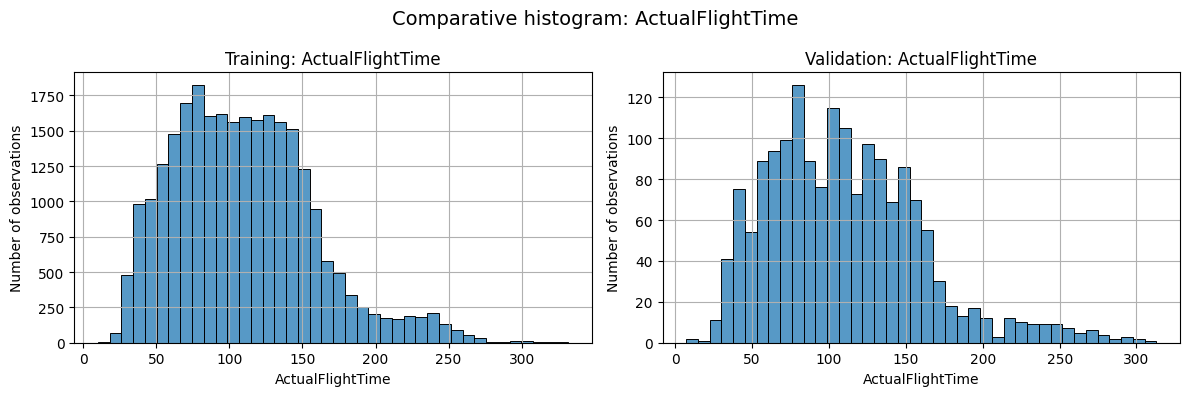

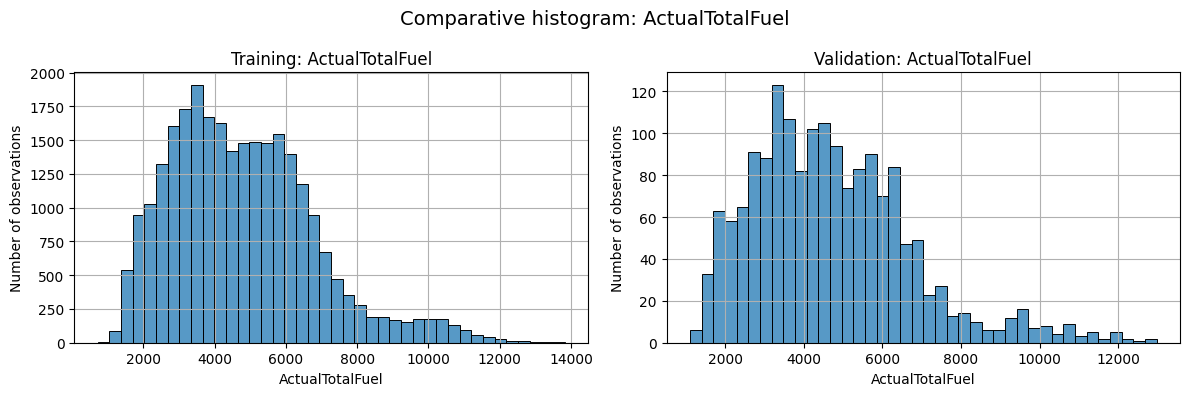

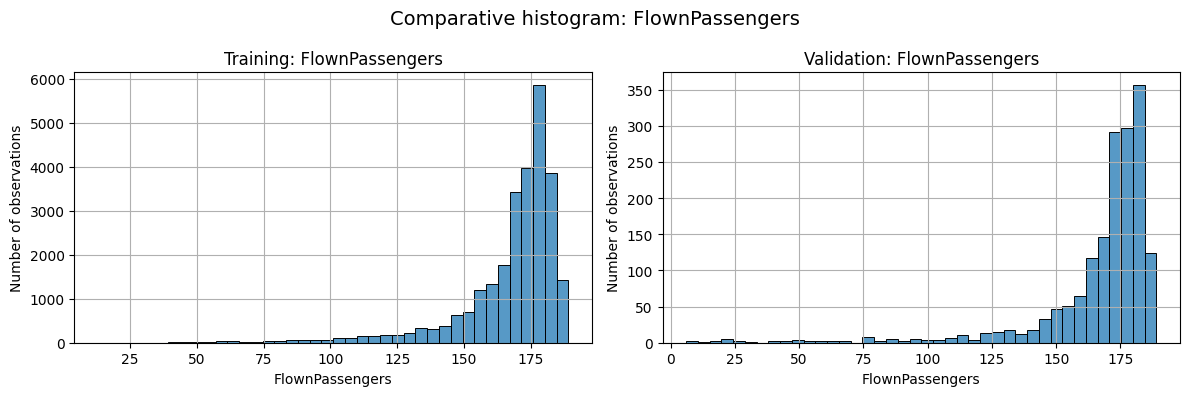

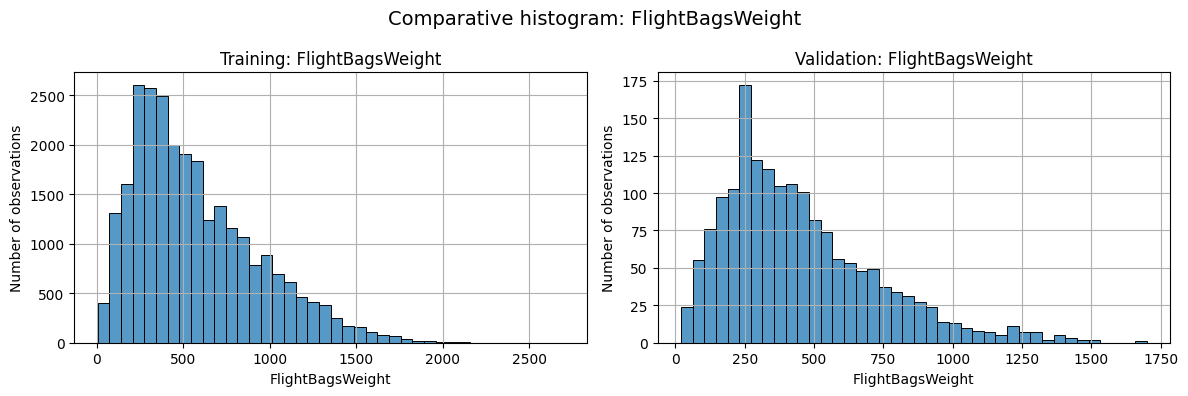

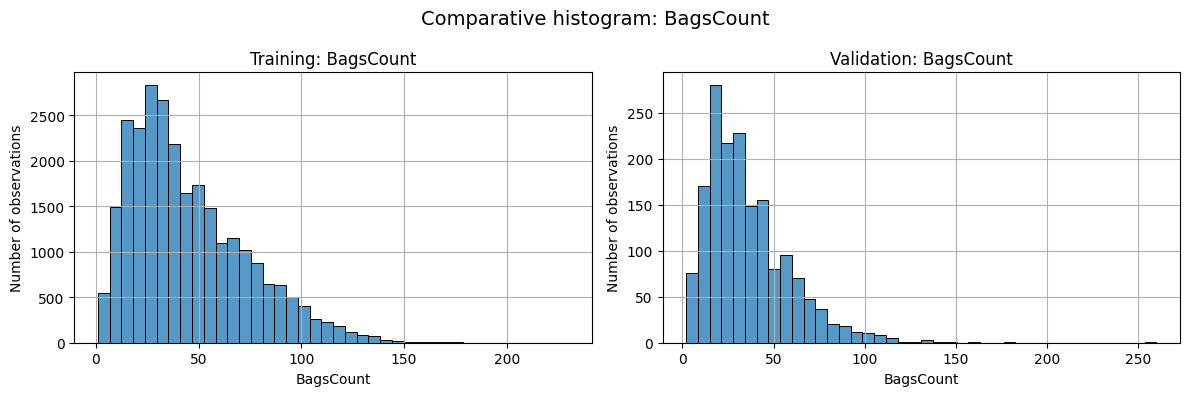

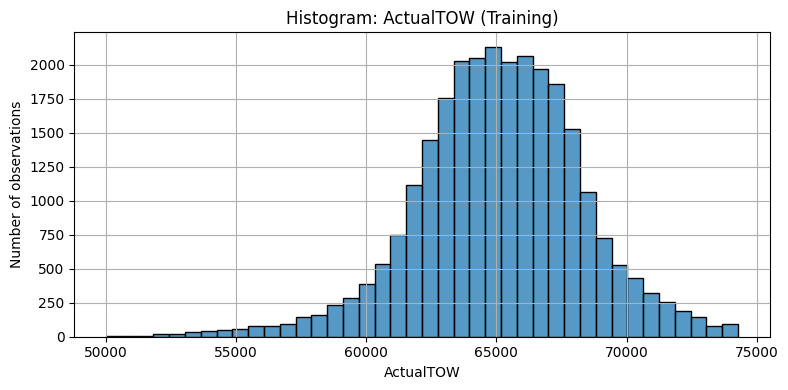

In [225]:
plot_comparative_histograms(training_cleaned, validation_cleaned, columns_to_plot)


plt.figure(figsize=(8, 4))
sns.histplot(training_cleaned['ActualTOW'], bins=40, kde=False)
plt.title("Histogram: ActualTOW (Training)")
plt.xlabel("ActualTOW")
plt.ylabel("Number of observations")
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter Plots

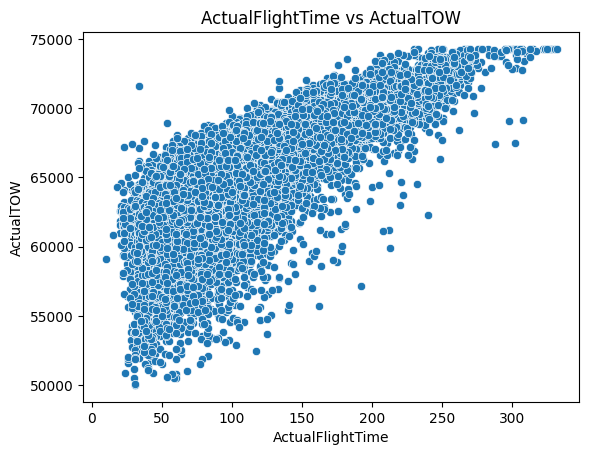

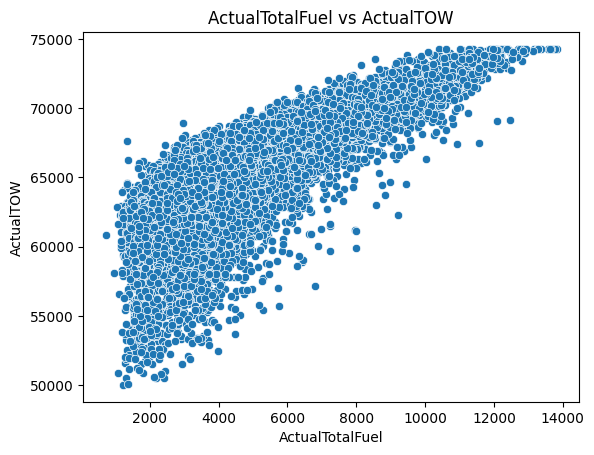

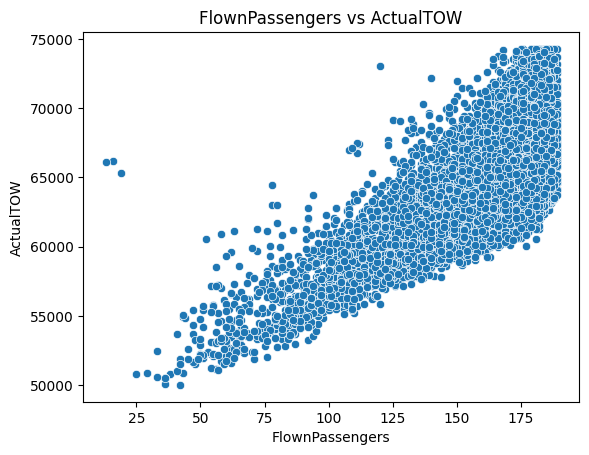

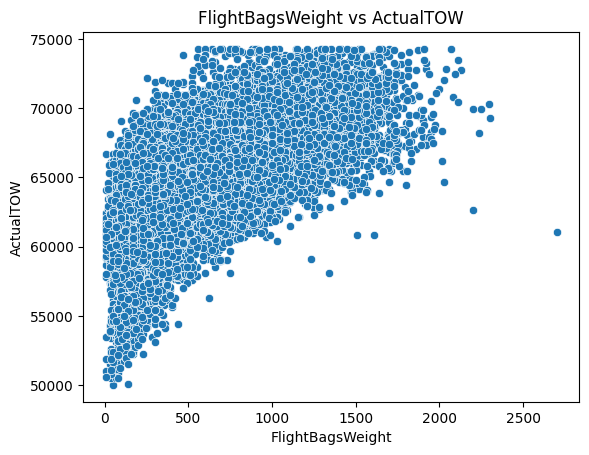

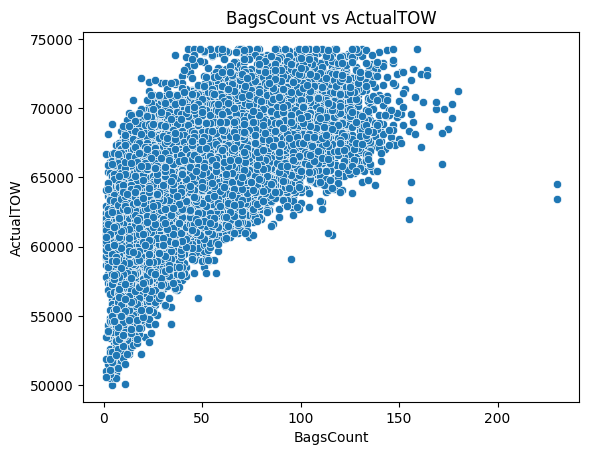

In [226]:
sns.scatterplot(x='ActualFlightTime', y='ActualTOW', data=training_cleaned)
plt.title("ActualFlightTime vs ActualTOW")
plt.show()


sns.scatterplot(x='ActualTotalFuel', y='ActualTOW', data=training_cleaned)
plt.title("ActualTotalFuel vs ActualTOW")
plt.show()

sns.scatterplot(x='FlownPassengers', y='ActualTOW', data=training_cleaned)
plt.title("FlownPassengers vs ActualTOW")
plt.show()

sns.scatterplot(x='FlightBagsWeight', y='ActualTOW', data=training_cleaned)
plt.title("FlightBagsWeight vs ActualTOW")
plt.show()

sns.scatterplot(x='BagsCount', y='ActualTOW', data=training_cleaned)
plt.title("BagsCount vs ActualTOW")
plt.show()

# heatmap

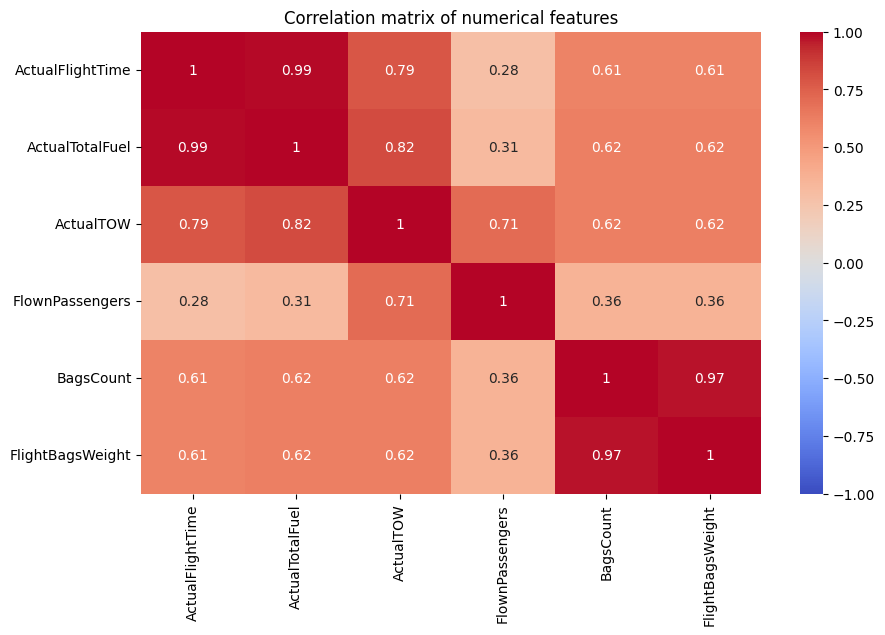

In [227]:
corr = training_cleaned.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Correlation matrix of numerical features")
plt.show()

# fill missing data trainig and validation

In [228]:

def fill_missing_knn(train_df, target_df, n_neighbors=5):
    """
    Fills missing values in target_df using KNNImputer fitted on train_df.

    Parameters:
    - train_df: DataFrame without missing values (used to fit the imputer)
    - target_df: DataFrame with missing values to be filled
    - n_neighbors: number of neighbors to use for imputation

    Returns:
    - filled DataFrame (same shape as target_df)
    """

    combined = pd.concat([train_df, target_df], axis=0)
    

    numeric_cols = combined.select_dtypes(include=['number']).columns
    imputer = KNNImputer(n_neighbors=n_neighbors)

 
    combined_numeric = pd.DataFrame(imputer.fit_transform(combined[numeric_cols]),
                                    columns=numeric_cols,
                                    index=combined.index)
    
   
    combined[numeric_cols] = combined_numeric

   
    filled_df = combined.loc[target_df.index]

    return filled_df





trainig_fill_missing_rows = fill_missing_knn(training_cleaned, trainig_missing_rows)
training_cleaned_without_actualTOW = training_cleaned.drop(columns=["ActualTOW"])
validate_fill_missing_rows = fill_missing_knn(training_cleaned_without_actualTOW, validate_missing_rows)


training_full = pd.concat([training_cleaned, trainig_fill_missing_rows])
training_full = training_full[~training_full.index.duplicated(keep='last')]
training_full = training_full.sort_index().reset_index(drop=True)



validation_full = pd.concat([validation_cleaned, validate_fill_missing_rows])
validation_full = validation_full[~validation_full.index.duplicated(keep='last')]
validation_full = validation_full.sort_index().reset_index(drop=True)





# Trainig full info

In [229]:



training_full = training_full[
    (training_full['ActualFlightTime'].between(10, 500)) & 
    (training_full['ActualTotalFuel'].between(500, 14000)) & 
    (training_full['FlownPassengers'].between(0, 200)) & 
    (training_full['FlightBagsWeight'].between(0, 3000)) &  
    (training_full['BagsCount'].between(0, 300)) &  
    (training_full['ActualTOW'].between(50000, 75000))  
].copy()

print(training_full.columns.tolist())
print("Shape:", training_full.shape)
print(training_full.info())
training_full.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (29639, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 29639 entries, 0 to 29695
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  29639 non-null  float64
 1   ActualTotalFuel   29639 non-null  float64
 2   ActualTOW         29639 non-null  float64
 3   FlownPassengers   29639 non-null  float64
 4   BagsCount         29639 non-null  float64
 5   FlightBagsWeight  29639 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB
None


,ActualFlightTime,ActualTotalFuel,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight
count,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000
mean,109.847464,4784.580991,65056.044860,167.285846,45.044185,572.983636
std,48.518538,2059.701464,3268.145249,20.013891,27.831190,353.549281
min,10.000000,720.000000,50011.000000,4.000000,1.000000,3.000000
25%,73.000000,3216.000000,63127.000000,163.000000,24.000000,300.000000
50%,106.000000,4540.000000,65136.600000,173.000000,39.000000,490.000000
75%,140.000000,6010.000000,67172.000000,179.000000,61.000000,780.000000
max,333.000000,13820.000000,74283.000000,189.000000,230.000000,2700.000000


# Validation full info

In [230]:
print(validation_full.columns.tolist())
print("Shape:", validation_full.shape)
print(validation_full.info())
validation_full.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']
Shape: (1878, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  1878 non-null   float64
 1   ActualTotalFuel   1878 non-null   float64
 2   FlownPassengers   1878 non-null   float64
 3   BagsCount         1878 non-null   float64
 4   FlightBagsWeight  1878 non-null   float64
dtypes: float64(5)
memory usage: 73.5 KB
None


,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,110.446219,4709.011715,165.990628,36.737913,457.533333
std,51.150847,2071.596772,26.446580,23.750328,279.669151
min,7.000000,1100.000000,6.000000,2.000000,20.000000
25%,72.000000,3200.000000,163.000000,20.000000,250.000000
50%,104.000000,4420.500000,174.000000,31.000000,390.000000
75%,140.000000,5895.500000,180.000000,48.000000,600.000000
max,318.000000,13040.000000,189.000000,260.000000,1700.000000


# Save full csv files

In [231]:
training_full.to_csv("../Data/processed/training_full.csv", sep="\t", index=False)
validation_full.to_csv("../Data/processed/validation_full.csv", sep="\t", index=False)

# Add Extra Engineering Features training

In [232]:
training_full["FuelPerPassenger"] = training_full["ActualTotalFuel"] / training_full["FlownPassengers"].replace(0, np.nan)

training_full["TotalPayloadEstimate"] = training_full["FlownPassengers"] * 80 + training_full["FlightBagsWeight"]

training_full = training_full.fillna(0)

selected_features = ["ActualFlightTime", "ActualTotalFuel", "FuelPerPassenger", "TotalPayloadEstimate"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(training_full[selected_features])
poly_feature_names = poly.get_feature_names_out(selected_features)

df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
training_full = training_full.drop(columns=selected_features).reset_index(drop=True)
training_full_with_extra_features = pd.concat([training_full, df_poly], axis=1)

# Add Extra Engineering Features validation

In [233]:
validation_full["FuelPerPassenger"] = validation_full["ActualTotalFuel"] / validation_full["FlownPassengers"].replace(0, np.nan)
validation_full["TotalPayloadEstimate"] = validation_full["FlownPassengers"] * 80 + validation_full["FlightBagsWeight"]


validation_full = validation_full.fillna(0)

selected_features = ["ActualFlightTime", "ActualTotalFuel", "FuelPerPassenger", "TotalPayloadEstimate"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(validation_full[selected_features])
poly_feature_names = poly.get_feature_names_out(selected_features)

df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
validation_full = validation_full.drop(columns=selected_features).reset_index(drop=True)
validation_full_with_extra_features = pd.concat([validation_full, df_poly], axis=1)

# Trainig info

In [234]:
print(training_full_with_extra_features.columns.tolist())
print("Shape:", training_full_with_extra_features.shape)
print(training_full_with_extra_features.info())
training_full_with_extra_features.describe(include='all')

['ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight', 'ActualFlightTime', 'ActualTotalFuel', 'FuelPerPassenger', 'TotalPayloadEstimate', 'ActualFlightTime^2', 'ActualFlightTime ActualTotalFuel', 'ActualFlightTime FuelPerPassenger', 'ActualFlightTime TotalPayloadEstimate', 'ActualTotalFuel^2', 'ActualTotalFuel FuelPerPassenger', 'ActualTotalFuel TotalPayloadEstimate', 'FuelPerPassenger^2', 'FuelPerPassenger TotalPayloadEstimate', 'TotalPayloadEstimate^2']
Shape: (29639, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29639 entries, 0 to 29638
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ActualTOW                              29639 non-null  float64
 1   FlownPassengers                        29639 non-null  float64
 2   BagsCount                              29639 non-null  float64
 3   FlightBagsWeight                       29639 non-null  f

,ActualTOW,FlownPassengers,BagsCount,FlightBagsWeight,ActualFlightTime,ActualTotalFuel,FuelPerPassenger,TotalPayloadEstimate,ActualFlightTime^2,ActualFlightTime ActualTotalFuel,ActualFlightTime FuelPerPassenger,ActualFlightTime TotalPayloadEstimate,ActualTotalFuel^2,ActualTotalFuel FuelPerPassenger,ActualTotalFuel TotalPayloadEstimate,FuelPerPassenger^2,FuelPerPassenger TotalPayloadEstimate,TotalPayloadEstimate^2
count,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,2.963900e+04,29639.000000,2.963900e+04,2.963900e+04,2.963900e+04,2.963900e+04,2.963900e+04,2.963900e+04,2.963900e+04
mean,65056.044860,167.285846,45.044185,572.983636,109.847464,4784.580991,28.733392,13955.851345,14420.434596,6.246286e+05,3696.357430,1.565496e+06,2.713444e+07,1.602241e+05,6.827336e+07,1.048111e+03,4.014384e+05,1.978632e+08
std,3268.145249,20.013891,27.831190,353.549281,48.518538,2059.701464,14.916803,1759.972774,12862.971069,5.539574e+05,3406.388583,7.794361e+05,2.397683e+07,1.449845e+05,3.343925e+07,8.802482e+03,1.795960e+05,4.268523e+07
min,50011.000000,4.000000,1.000000,3.000000,10.000000,720.000000,4.210526,968.000000,100.000000,9.096000e+03,63.157895,5.736000e+04,5.184000e+05,3.031579e+03,2.581200e+06,1.772853e+01,6.176842e+04,9.370240e+05
25%,63127.000000,163.000000,24.000000,300.000000,73.000000,3216.000000,19.760479,13470.000000,5329.000000,2.350300e+05,1455.949153,9.676800e+05,1.034266e+07,6.438172e+04,4.276726e+07,3.904765e+02,2.649084e+05,1.814409e+08
50%,65136.600000,173.000000,39.000000,490.000000,106.000000,4540.000000,27.664671,14400.000000,11236.000000,4.795200e+05,2912.138728,1.463630e+06,2.061160e+07,1.256729e+05,6.310710e+07,7.653340e+02,3.774104e+05,2.073600e+08
75%,67172.000000,179.000000,61.000000,780.000000,140.000000,6010.000000,35.084272,15020.000000,19600.000000,8.378000e+05,4848.271087,2.048997e+06,3.612010e+07,2.090725e+05,8.866976e+07,1.230906e+03,5.057496e+05,2.256004e+08
max,74283.000000,189.000000,230.000000,2700.000000,333.000000,13820.000000,1135.000000,17119.000000,110889.000000,4.582080e+06,151714.285714,5.236691e+06,1.909924e+08,5.152900e+06,2.258284e+08,1.288225e+06,1.214131e+06,2.930602e+08


# Validation info

In [235]:
print(validation_full_with_extra_features.columns.tolist())
print("Shape:", validation_full_with_extra_features.shape)
print(validation_full_with_extra_features.info())
validation_full_with_extra_features.describe(include='all')

['FlownPassengers', 'BagsCount', 'FlightBagsWeight', 'ActualFlightTime', 'ActualTotalFuel', 'FuelPerPassenger', 'TotalPayloadEstimate', 'ActualFlightTime^2', 'ActualFlightTime ActualTotalFuel', 'ActualFlightTime FuelPerPassenger', 'ActualFlightTime TotalPayloadEstimate', 'ActualTotalFuel^2', 'ActualTotalFuel FuelPerPassenger', 'ActualTotalFuel TotalPayloadEstimate', 'FuelPerPassenger^2', 'FuelPerPassenger TotalPayloadEstimate', 'TotalPayloadEstimate^2']
Shape: (1878, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   FlownPassengers                        1878 non-null   float64
 1   BagsCount                              1878 non-null   float64
 2   FlightBagsWeight                       1878 non-null   float64
 3   ActualFlightTime                       1878 non-null   float64
 4   Actu

,FlownPassengers,BagsCount,FlightBagsWeight,ActualFlightTime,ActualTotalFuel,FuelPerPassenger,TotalPayloadEstimate,ActualFlightTime^2,ActualFlightTime ActualTotalFuel,ActualFlightTime FuelPerPassenger,ActualFlightTime TotalPayloadEstimate,ActualTotalFuel^2,ActualTotalFuel FuelPerPassenger,ActualTotalFuel TotalPayloadEstimate,FuelPerPassenger^2,FuelPerPassenger TotalPayloadEstimate,TotalPayloadEstimate^2
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1.878000e+03,1878.000000,1.878000e+03,1.878000e+03,1.878000e+03,1.878000e+03,1878.000000,1.878000e+03,1.878000e+03
mean,165.990628,36.737913,457.533333,110.446219,4709.011715,31.686168,13736.783600,14813.383387,6.247246e+05,4247.409096,1.527999e+06,2.646402e+07,1.749720e+05,6.550600e+07,2496.190047,3.918784e+05,1.935925e+08
std,26.446580,23.750328,279.669151,51.150847,2071.596772,38.638993,2212.674086,14204.192964,5.891312e+05,6586.418873,7.879484e+05,2.458954e+07,2.353637e+05,3.272780e+07,23859.243056,1.786741e+05,4.721345e+07
min,6.000000,2.000000,20.000000,7.000000,1100.000000,6.686047,510.000000,49.000000,2.275000e+04,123.641304,6.630000e+04,1.210000e+06,7.688953e+03,2.241450e+06,44.703218,8.873881e+04,2.601000e+05
25%,163.000000,20.000000,250.000000,72.000000,3200.000000,18.868376,13430.000000,5184.000000,2.258625e+05,1373.450742,9.608950e+05,1.024000e+07,6.053094e+04,4.206543e+07,356.015621,2.612222e+05,1.803649e+08
50%,174.000000,31.000000,390.000000,104.000000,4420.500000,26.408840,14380.000000,10816.000000,4.631810e+05,2724.481142,1.419430e+06,1.954082e+07,1.186643e+05,6.066080e+07,697.426818,3.657452e+05,2.067844e+08
75%,180.000000,48.000000,600.000000,140.000000,5895.500000,35.251671,14900.000000,19600.000000,8.203250e+05,5002.485206,1.994941e+06,3.475698e+07,2.109897e+05,8.446436e+07,1242.680299,4.890975e+05,2.220100e+08
max,189.000000,260.000000,1700.000000,318.000000,13040.000000,813.333333,16550.000000,101124.000000,4.146720e+06,116306.666667,4.931544e+06,1.700416e+08,3.969067e+06,2.022243e+08,661511.111111,1.134980e+06,2.739025e+08


# Filter data  

In [236]:
training_full_with_extra_features = training_full_with_extra_features[
    (training_full_with_extra_features['ActualFlightTime'].between(10, 300)) &
    (training_full_with_extra_features['ActualTotalFuel'].between(500, 13500)) &
    (training_full_with_extra_features['FlownPassengers'].between(0, 190)) &
    (training_full_with_extra_features['FlightBagsWeight'].between(0, 2500)) &
    (training_full_with_extra_features['BagsCount'].between(0, 200)) &
    (training_full_with_extra_features['ActualTOW'].between(50000, 75000)) &
    (training_full_with_extra_features['FuelPerPassenger'].between(5, 80)) &
    (training_full_with_extra_features['TotalPayloadEstimate'].between(2000, 17000)) &
    (training_full_with_extra_features['ActualFlightTime^2'] <= 100000) &
    (training_full_with_extra_features['ActualFlightTime ActualTotalFuel'] <= 4_000_000) &
    (training_full_with_extra_features['ActualFlightTime FuelPerPassenger'] <= 20_000) &
    (training_full_with_extra_features['ActualFlightTime TotalPayloadEstimate'] <= 5_500_000) &
    (training_full_with_extra_features['ActualTotalFuel^2'] <= 2e8) &
    (training_full_with_extra_features['ActualTotalFuel FuelPerPassenger'] <= 2.5e6) &
    (training_full_with_extra_features['ActualTotalFuel TotalPayloadEstimate'] <= 2.3e8) &
    (training_full_with_extra_features['FuelPerPassenger^2'] <= 6500) &
    (training_full_with_extra_features['FuelPerPassenger TotalPayloadEstimate'] <= 1e6) &
    (training_full_with_extra_features['TotalPayloadEstimate^2'] <= 2.5e8)
].copy()

# Save final csv files 

In [237]:
training_full_with_extra_features.to_csv("../Data/processed/training_full_with_extra_features.csv", sep="\t", index=False)
validation_full_with_extra_features.to_csv("../Data/processed/validation_full_with_extra_features.csv", sep="\t", index=False)